# **FORDGO BIKE: RIDE ANALYSIS**

# Table of Content##

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#datawrangling">Data Wrangling</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
# Introduction##

**Bay Wheels**, known as **FordGo bikes** for a brief period, is a regional public bicycle sharing  system in California’s San Francisco Bay area. It was established in August 2013.

In September 2016, Ford announced that its sponsorship with Bay wheels and on June 28, 2017, they renamed the company to Ford GoBike. In June 2019, after its acquisition by Lyft the system was rebranded to Bay Wheels and they dropped the Ford naming.

As of January 2018, the Bay Wheels system had about **10,000 annual subscribers**, over **2,600 bicycles** in **262 stations** across San Francisco, East Bay and San Jose.

The data analyzed below is of February 2019. The source of the data is udacity.The dataset has 16 columns and 1,83,412 rows, which means approximately 1,83,000 rides were made during that month.

The original columns of the data set are as follows:
<br>duration_sec: duration for which bike is rented in seconds
<br>start_time: Date and time on which the bike was rented
<br>end_time: Date and time on which the bike was dropped
<br>start_station_id: Station ID from where the bike was rented
<br>start_station_name: Station name from where the bike was rented
<br>start_station_latitude: Latitude of the station from where the bike was rented
<br>start_station_longitude: Longitude of the station from where the bike was rented
<br>end_station_id: Station ID where the bike was dropped
<br>end_station_name: Station name where the bike was dropped
<br>end_station_latitude: Latitude of the station where the bike was dropped
<br>end_station_longitude: Longitude of the station where the bike was dropped
<br>bike_id: ID of the bike rented
<br>user_type: Customer or subscriber
<br>member_birth_year: Birth year of the rider
<br>member_gender: Gender of the rider
<br>bike_share_for_all_trip: yes/no

Questions analyzed are as follows:

1. Which are the most popular pick up and drop off stations?
2. At what time of the week, the demand for the bike is at the peak? For how much time do they ride the bike on an average?
3. At what time of the day there are maximum number of riders? For how much time do they ride the bike on an average?
4. How much percentage of the riders are subscribers and how much percentage of them are customers? Note: riders can either be subscribers on they can rent it on adhoc basis

<a id='limitations'></a>
## Limitations##

The data analyzed is only for one month. Demand for bike is largely impacted by the weather mainly rain, heat and cold. Rain is the most adverse weather for riding bikes. Hence, it might be a good idea to have the weather data along with this.

In [83]:
!pip install folium

In [84]:
# importing the libraries

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import folium


In [85]:
#Loading the data and checking the first few rows

df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


In [86]:
# Checking the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [87]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<a id='datawrangling'></a>
# Data Wrangling

In [88]:
#Checking for nulls stations

df[(df.start_station_id.isnull())| (df.end_station_name.isnull())].index

Int64Index([   475,   1733,   3625,   4070,   5654,   6214,   8499,   8783,
             10967,  11071,
            ...
            155470, 161400, 161844, 172481, 174807, 176154, 179730, 179970,
            180106, 181201],
           dtype='int64', length=197)

In [89]:
#dropping the stations where station name is NULL

df.drop(df[(df.start_station_id.isnull())| (df.end_station_name.isnull())].index, inplace = True)

In [90]:
# testing the data after dropping nulls

df[(df.start_station_id.isnull())| (df.end_station_name.isnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null object
end_time                   183215 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 23.8+ MB


In [92]:
# Changing the data and time column from string to datetime

df["start_time"] = df["start_time"].astype("datetime64")
df["end_time"] = df["end_time"].astype("datetime64")
df["duration_min"] = round(df.duration_sec/60, 2)

#Testing data
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
duration_min               183215 non-null float64
dtypes: datetime6

In [93]:
# Finding the day of the week from the date

df["start_weekday"] = df.start_time.dt.weekday

# Data dictionary
weekday_dict = {0:"Monday", 1: "Tuesday", 2:"Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6 : "Sunday"}

#Getting weekday from no. of day in the week
df["start_weekday"] = df["start_weekday"].map(weekday_dict)


<a id='eda'></a>
# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab0541c208>]], dtype=object)

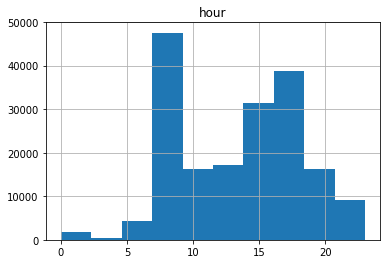

In [94]:
#Exploring the data

df["hour"] = df.start_time.dt.hour
df.hist("hour")


In [95]:
# Adding ride counts. Each row item is a ride count

df["count"] = 1
df["count"].head()

0    1
1    1
2    1
3    1
4    1
Name: count, dtype: int64

In [96]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_weekday,hour,count
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75,Thursday,17,1
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.68,Thursday,18,1
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.90,Thursday,12,1
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.17,Thursday,17,1
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.42,Thursday,23,1


## 1. Which are the most popular pick up and drop off stations? ##

In [97]:
startstationdf = df.groupby(["start_station_name", "start_station_latitude","start_station_longitude"]).count()["count"].reset_index()
startstationdf.sort_values('count', ascending = False).head()

,start_station_name,start_station_latitude,start_station_longitude,count
199,Market St at 10th St,37.776619,-122.417385,3904
260,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3544
82,Berry St at 4th St,37.775880,-122.393170,3052
220,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2895
241,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2760


In [98]:
# Popular pickup stations
sfo = folium.Map( location = [37.77, -122.41], zoom_start = 12.5)
for lat,long, startstation, count in zip (startstationdf["start_station_latitude"],startstationdf["start_station_longitude"], 
                                          startstationdf["start_station_name"],startstationdf["count"]):folium.CircleMarker([lat, long], 
                                        fill_color = "blue",fill_opacity= 0.5,line_color = "blue",radius = 0.0030 * count,
                                        popup = startstation + ": " + str(count) + " rides", tooltip =startstation + ": " + str(count) + " rides").add_to(sfo)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Popular pick-up stations</b></h3>
             '''
sfo.get_root().html.add_child(folium.Element(title_html))
sfo

In [99]:
endstationdf = df.groupby(["end_station_name", "end_station_latitude","end_station_longitude"]).count()["count"].reset_index()
endstationdf.sort_values('count', ascending = False).head()

,end_station_name,end_station_latitude,end_station_longitude,count
260,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4857
199,Market St at 10th St,37.776619,-122.417385,3973
220,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3647
262,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3368
241,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2997


In [100]:
sfoend = folium.Map( location = [37.77, -122.41], zoom_start = 12.5)
for lat,long, endstation, count in zip (endstationdf["end_station_latitude"],endstationdf["end_station_longitude"], 
                                          endstationdf["end_station_name"],endstationdf["count"]):folium.CircleMarker([lat, long], 
                                        fill_color = "blue",fill_opacity= 0.5,line_color = "blue",
                                        radius = 0.0030 * count,line_opacity = 0.5,alpha=0.5,
                                        popup = endstation + ": " + str(count) + " rides",
                                        tooltip = endstation + ": " + str(count) + " rides").add_to(sfoend)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Popular drop-off stations</b></h3>
             '''
sfoend.get_root().html.add_child(folium.Element(title_html))
sfoend

1.a Market Street at 10th St., San Francisco caltrain station2, Berry Street at 4th Street are few of the most popular pick up stations in San Francisco, where the bikes picked up are more than 3000 per month. These stations are located in the heart of the city and they are well connected to other parts of the city through trains,buses or freeways.

San Francisco Caltrain station2, Market Street at 10th St., Montgomery Street BART Station are few of the most popular drop-off stations in San Francisco with drop off more than 3500 per month. These stations are located in the heart of the city and they are well connected to other parts of the city through trains,buses or freeways.



## 2. At what time of the day there are maximum number of riders? For how much time do they ride the bike on an average? ##

In [101]:
df["start_weekday"] = df.start_weekday.astype("category")

In [102]:
weekday_bar = df.groupby(by= 'start_weekday')["count"].count().reset_index()
weekday_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
start_weekday    7 non-null category
count            7 non-null int64
dtypes: category(1), int64(1)
memory usage: 519.0 bytes


In [103]:
# weekday_bar.start_weekday = weekday_bar.start_weekday.astype('category')

In [104]:
output = pd.Categorical(values = df.start_weekday, categories = ["Monday" ,"Tuesday","Wednesday", "Thursday","Friday", "Saturday", "Sunday"], ordered = True)

In [105]:
output

[Thursday, Thursday, Thursday, Thursday, Thursday, ..., Friday, Friday, Friday, Friday, Friday]
Length: 183215
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [106]:
weekday_bar['start_weekday']= weekday_bar['start_weekday'].astype(output)


In [107]:
weekday_bar = weekday_bar.sort_values('start_weekday').reset_index()
weekday_bar

,index,start_weekday,count
0,1,Monday,26807
1,5,Tuesday,31781
2,6,Wednesday,29609
3,4,Thursday,35176
4,0,Friday,28962
5,2,Saturday,15377
6,3,Sunday,15503


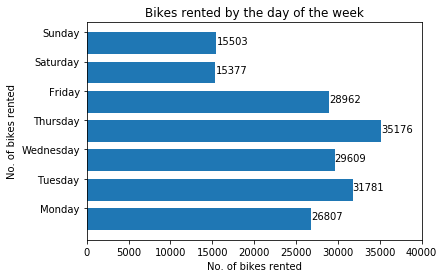

In [108]:
# To be deleted

x = weekday_bar['start_weekday']
y = weekday_bar['count']
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.xlabel('No. of bikes rented')
plt.ylabel('No. of bikes rented')
plt.title('Bikes rented by the day of the week')
plt.xlim([0,40000])
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v),ha= "left", va = "top")

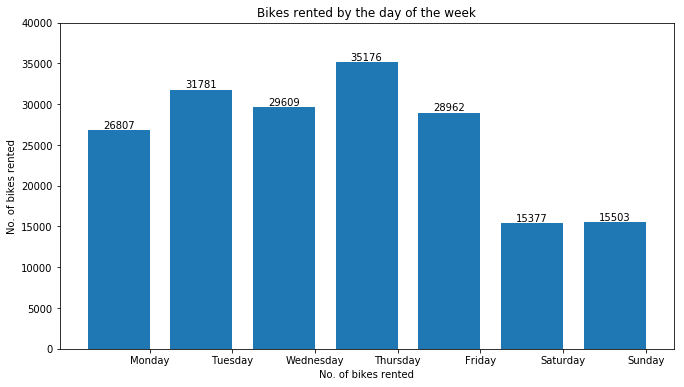

In [109]:
x = weekday_bar['start_weekday']
y = weekday_bar['count']
fig, ax = plt.subplots(figsize=(11,6))    
width = 0.75 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(ind, y, width)
ax.set_xticks(ind+width/2)
ax.set_xticklabels(x, minor=False)
plt.xlabel('No. of bikes rented')
plt.ylabel('No. of bikes rented')
plt.title('Bikes rented by the day of the week')
plt.ylim([0,40000])
for i in range(len(x)):
    plt.text(i,y[i], y[i], ha= "center", va = "bottom" )

In [110]:
weekday_avgmin_df = df.groupby(by= 'start_weekday')["duration_min"].mean().reset_index()
weekday_avgmin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
start_weekday    7 non-null category
duration_min     7 non-null float64
dtypes: category(1), float64(1)
memory usage: 519.0 bytes


In [111]:
weekday_avgmin_df.start_weekday = weekday_avgmin_df.start_weekday.astype(output)
weekday_avgmin_df = weekday_avgmin_df.sort_values('start_weekday').reset_index()
weekday_avgmin_df.duration_min = round(weekday_avgmin_df.duration_min,2)
weekday_avgmin_df

,index,start_weekday,duration_min
0,1,Monday,11.88
1,5,Tuesday,11.05
2,6,Wednesday,11.23
3,4,Thursday,11.65
4,0,Friday,11.59
5,2,Saturday,15.03
6,3,Sunday,15.32


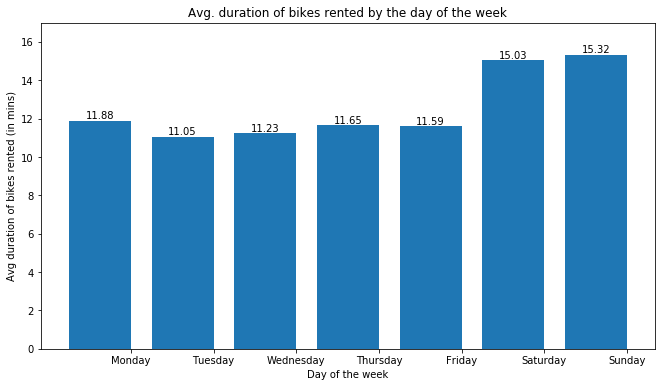

In [112]:
x = weekday_avgmin_df['start_weekday']
y = weekday_avgmin_df['duration_min']
fig, ax = plt.subplots(figsize=(11,6))    
width = 0.75 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(ind, y, width)
ax.set_xticks(ind+width/2)
ax.set_xticklabels(x, minor=False)
plt.xlabel('Day of the week')
plt.ylabel('Avg duration of bikes rented (in mins)')
plt.title('Avg. duration of bikes rented by the day of the week')
plt.ylim([0,17])
for i in range(len(x)):
    plt.text(i,y[i], y[i], ha= "center", va = "bottom" )

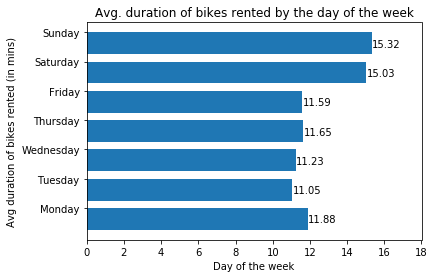

In [113]:
# To be deleted
x = weekday_avgmin_df['start_weekday']
y = weekday_avgmin_df['duration_min']
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.xlabel('Day of the week')
plt.ylabel('Avg duration of bikes rented (in mins)')
plt.title('Avg. duration of bikes rented by the day of the week')
plt.xlim([0,18])
for i, v in enumerate(y):
    ax.text(v + 0.8, i + .15, str(v), ha= "center",va = "top")

2.a The demand for the bikes is highest on Thursday totalling to approximately 35,000 per month.


The bike is rented for higher minutes in weekend as compare to weekdays. On an average bikes are rented for 15 minutes on weekend.

## 3. At what time of the day there are maximum number of riders? For how much time do they ride the bike on an average?##

In [114]:
hour_df = df.groupby('hour').count()['count'].reset_index()
hour_df.head(3)

,hour,count
0,0,925
1,1,548
2,2,380


([<matplotlib.axis.XTick at 0x7faafef990f0>,
 <a list of 24 Text xticklabel objects>)

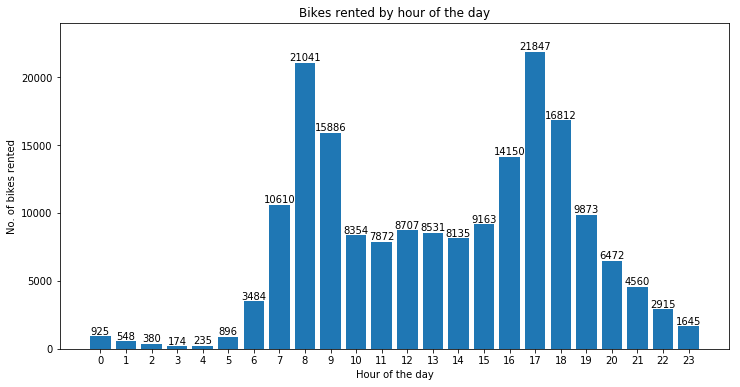

In [115]:
#hour_df.plot(x = 'hour',y = 'count', kind='bar',cmap= 'tab20',figsize =(12,7),legend = False)
plt.figure(figsize= (12,6))
plt.bar(hour_df["hour"], hour_df["count"])
plt.xticks(rotation = 0)
plt.xlabel('Hour of the day')
plt.ylabel('No. of bikes rented')
plt.title('Bikes rented by hour of the day')
for i in range(len(hour_df["hour"])):
    plt.text(i,hour_df["count"][i], hour_df["count"][i], ha= "center", va = "bottom" )
plt.ylim([0,24000])
plt.xticks(np.arange(24))

In [116]:
hour_avgmin_df = df.groupby('hour').mean()['duration_min'].reset_index()
hour_avgmin_df.duration_min = round(hour_avgmin_df.duration_min, 1)
hour_avgmin_df.head(2)

,hour,duration_min
0,0,13.5
1,1,11.8


([<matplotlib.axis.XTick at 0x7fab0567e898>,
 <a list of 24 Text xticklabel objects>)

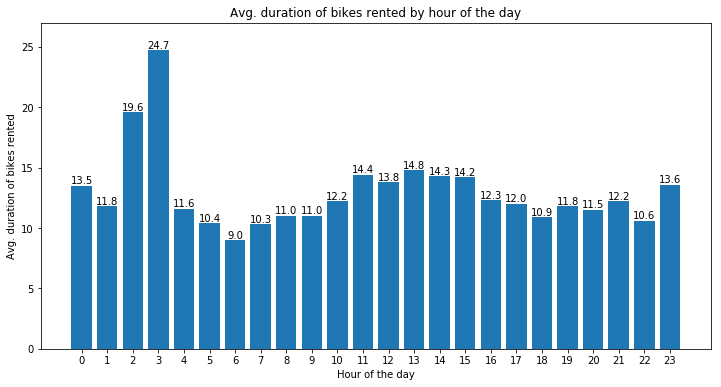

In [117]:
# hour_avgmin_df.plot(x = 'hour',y = 'duration_sec', kind='bar',cmap= 'tab20',figsize =(12,7),legend = False)
plt.figure(figsize= (12,6))
plt.bar(hour_avgmin_df["hour"], hour_avgmin_df["duration_min"])
plt.xticks(rotation = 0)
plt.xlabel('Hour of the day')
plt.ylabel('Avg. duration of bikes rented')
plt.title('Avg. duration of bikes rented by hour of the day')
for i in range(len(hour_avgmin_df["hour"])):
    plt.text(i,hour_avgmin_df["duration_min"][i], hour_avgmin_df["duration_min"][i], ha= "center", va = "bottom" )
plt.ylim([0,27])
plt.xticks(np.arange(24))

3.a The demand for the bike is highest between 8 and 9 AM and between 5 and 6 PM. The average duration of the bike rented during this time is 11 and 12 minutes respectively. It seems that these bikes would be rented mainly for commuting purposes.

The bike is rented for maximum amount of time which is almost 25 minutes between 3 AM and 4 PM. It might be a good idea to look at the data in the detail and consider whether this is one of the events or it's a routine thing.

## 4. How much percentage of the riders are subscribers and how much percentage of them are customers? ## 
*Note: riders can either be subscribers on they can rent it on adhoc basis*

In [118]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [119]:
customer_df = df.groupby(by= 'user_type')["count"].count().reset_index()
customer_df

,user_type,count
0,Customer,19801
1,Subscriber,163414


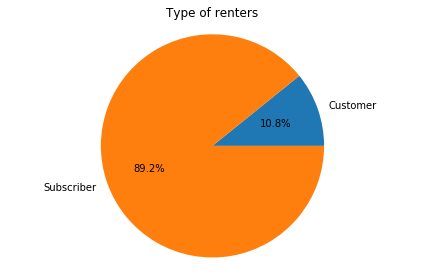

In [120]:
plt.title('Type of renters')
plt.pie(customer_df["count"], labels = customer_df["user_type"], shadow= False, autopct= '%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()


4.a Almost 89% of the renters are subscribers. It seems that they would be using the bike regularly.

<a id='conclusion'></a>
# Conclusion
- Market Street at 10th St., San Francisco caltrain station2, Berry Street at 4th Street are few of the most popular pick up stations in San Francisco, where the bikes picked up are more than 3000 per month. These stations are located in the heart of the city and they are well connected to other parts of the city through trains, buses or freeways.
<br> San Francisco Caltrain station2, Market Street at 10th St., Montgomery Street BART Station are few of the most popular drop-off stations in San Francisco with drop off more than 3500 per month. These stations are located in the heart of the city and they are well connected to other parts of the city through trains,buses or freeways.
- The demand for the bikes is highest on Thursday totalling to approximately 35,000 per month.
<br> The bike is rented for higher minutes in weekend as compare to weekdays. On an average bikes are rented for 15 minutes on weekend.
- The demand for the bike is highest between 8 and 9 AM and between 5 and 6 PM. The average duration of the bike rented during this time is 11 and 12 minutes respectively. It seems that these bikes would be rented mainly for commuting purposes.
<br> The bike is rented for maximum amount of time which is almost 25 minutes between 3 AM and 4 PM. It might be a good idea to look at the data in the detail and consider whether this is one of the events or it's a routine thing.
- Almost 89% of the renters are subscribers. It seems that they would be using bike regularly.